<a href="https://colab.research.google.com/github/grecoserafim/cars_machine_learning/blob/main/Machine_Learnig_cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATASET VENDA DE CARROS

O Objetivo desse código é comparar técnicas de Machine Learning para treinar o a precificação de Carros, atráves dos dados disponibilizados.


#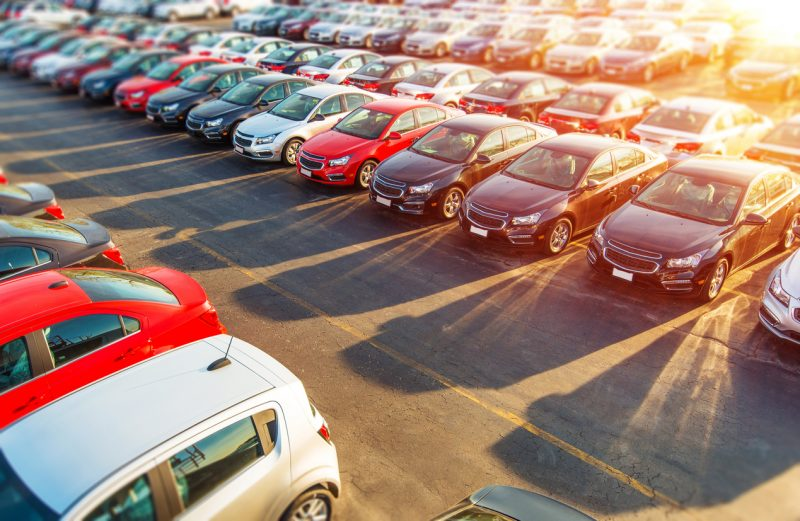

In [ ]:
#@title
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error


In [ ]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.drop('car_ID', axis=1, inplace=True)

display(df)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


Transformando dados categóricos em valores Inteiros, para melhor treinamento do ML

In [ ]:
X = df.copy()
y = X.pop("price")



for colname in X.select_dtypes("object"):
    le = LabelEncoder()
    X[colname] = le.fit_transform(X[colname])
    

discrete_features = X.dtypes == int

# Machine Learning Models

Decision Tree

In [ ]:


param_grid = {"max_leaf_nodes": [1, 10, 100, 1000]}

dt = DecisionTreeRegressor()

grid_dt = GridSearchCV(dt, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_dt.fit(X, y)

print("Melhor valor de max_leaf_nodes: ", grid_dt.best_params_['max_leaf_nodes'])

100 foi o melhor resultado para a Decision Tree

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
model1 = DecisionTreeRegressor(max_leaf_nodes=100, random_state=42)

# Treinando o modelo com os dados de treino
model1.fit(X_train, y_train)

# Realizando a predição com os dados de teste
y_pred = model1.predict(X_test)

# Calculando o erro médio absoluto
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)



Mean Absolute Error: 1826.2755322580647


In [ ]:

y_pred = model1.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"O coeficiente de determinação (R²) do modelo é {r2:.2f}")

O coeficiente de determinação (R²) do modelo é 0.90


Random Florest

In [ ]:


# valores para serem testados:
n_estimators_list = [1, 10, 100, 1000]

#variavel para testar melhor desenpenho
best_score = -float('inf')
best_n_estimators = None

for n_estimators in n_estimators_list:
    # cria o modelo com o valor atual de n_estimators
    model_n = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    
    # treina o modelo
    model_n.fit(X_train, y_train)
    
    # faz as previsões para os dados de teste
    y_pred = model_n.predict(X_test)
    
    # calcula o desempenho do modelo usando o coeficiente de determinação (R²)
    score = r2_score(y_test, y_pred)
    
    # atualiza as variáveis de melhor desempenho, se necessário
    if score > best_score:
        best_score = score
        best_n_estimators = n_estimators

print(f"Melhor valor de n_estimators: {best_n_estimators}")

Melhor valor de n_estimators: 1000


In [ ]:

# Definir modelo com 1000 árvores
model2 = RandomForestRegressor(n_estimators=1000, random_state=42)

# Treinar modelo com dados de treino
model2.fit(X_train, y_train)

# Avaliar desempenho em dados de teste
score = model2.score(X_test, y_test)
print("R² score do modelo de Random Forest: {:.2f}".format(score))

R² score do modelo de Random Forest: 0.94


XGBoost

In [ ]:

XGB_score = []
for n in [1, 10, 100, 1000]:
    XGB_model = XGBRegressor(n_estimators=n, random_state=42)
    scores = cross_val_score(XGB_model, X, y, cv=5)
    XGB_score.append((n, scores.mean(), scores.std()))
    
XGB_score

[(1, -1.8219680544355596, 1.3840169426175946),
 (10, 0.44149280604065255, 0.6634843704398233),
 (100, 0.4051958485076438, 0.7783703797911798),
 (1000, 0.40522573315252963, 0.7783132039366524)]

vamos utilizar 1000 n_estimators, por ter melhor score e a menor diferença absoluta em relação ao score médio.

In [ ]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

XGB_model = XGBRegressor(n_estimators=1000, random_state=42)
XGB_model.fit(X_train, y_train)

y_pred = XGB_model.predict(X_test)
print("R² score:", r2_score(y_test, y_pred))

R² score: 0.9147224356215277


# Foi notado que o Random Florest foi o modelo que obtive melhor desempenho para o treinamento de compras de carros
